## 투빅스 18기 Week1 전처리 및 EDA 과제 - 18기 이다인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 0. 데이터 불러오기

In [96]:
df = pd.read_csv('HR_Employee_Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## 1. 데이터 전처리 및 EDA

### 1.1 데이터 정보

#### Target = Attrition

1. Age : 해당 직원의 나이  
2. Attrition : 퇴직 여부 (종속변수)  
3. BusinessTravel : 출장의 빈도  
4. DailyRate : 일 대비 급여의 수준  
5. Department : 업무분야  
6. DistanceFromHome : 집과의 거리  
7. Education : 교육의 정도  
        1 Below College : 대학 이하  
        2 College : 전문대  
        3 Bachelor : 학사  
        4 Master : 석사  
        5 Doctor : 박사    
8. EducationField : 전공    
9. EmployeeCount : 직원 숫자  
10. EmployeeNumber : 직원 ID    
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도  
    1 Low : 불만족   
    2 Medium : 중간   
    3 High : 만족    
    4 Very High : 매우 만족  
12. Gender : 성별  
13. HourlyRate : 시간 대비 급여의 수준  
14. JobInvolvement : 업무 참여도  
    1 Low : 낮음   
    2 Medium : 중간  
    3 High : 높음  
    4 Very High : 매우 높음  
15. JobLevel : 업무의 수준  
16. JobRole : 업무 종류  
17. JobSatisfaction : 업무 만족도   
    1 Low : 불만족  
    2 Medium : 중간  
    3 High : 만족  
    4 Very High : 매우 만족  
18. MaritalStatus : 결혼 여부  
19. MonthlyIncome : 월 소득  
20. MonthlyRate : 월 대비 급여 수준  
21. NumCompaniesWorked : 일한 회사의 수  
22. Over18 : 18세 이상  
23. OverTime : 규정외 노동시간  
24. PercentSalaryHike : 급여의 증가분 백분율   
25. PerformanceRating : 업무 성과  
    1 Low : 좋지 않음  
    2 Good : 좋음  
    3 Excellent : 매우 좋음  
    4 Outstanding : 극도로 좋음  
26. RelationshipSatisfaction : 대인관계 만족도  
    1 Low : 불만족  
    2 Medium : 중간   
    3 High : 만족  
    4 Very High : 매우 만족  
27. StandardHours : 표준 시간  
28. StockOptionLevel : 스톡옵션 정도  
29. TotalWorkingYears : 경력 기간  
30. TrainingTimesLastYear : 교육 시간  
31. WorkLifeBalance : 일과 생활의 균형 정도  
    1 Bad : 나쁨  
    2 Good :  좋음  
    3 Better : 아주 좋음    
    4 Best : 극도로 좋음  
32. YearsAtCompany : 근속 연수  
33. YearsInCurrentRole : 현재 역할의 년수  
34. YearsSinceLastPromotion : 마지막 프로모션   
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간  

1개의 종속변수와 34개의 독립변수로 이루어진 데이터이다.

### 1.2 결측치 검토 및 제거

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

결측치는 없는 것으로 확인된다.

### 1.3 이상치 검토 및 제거

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

`nunique`를 통하여 column 별 고유값의 개수를 확인해 본 결과 **EmployeeNumber** 는 고유값의 개수가 1470개였다.  
이 EmployeeNumber 즉 직원ID는 모든 직원에게 부여되는 일종의 번호이므로 데이터 EDA에 필요하지 않다고 판단하여 삭제하였다.  
그리고 **EmployeeCount** , **Over18** , **StandardHours**  또한 고유값의 개수가 1이었고, 이 또한 데이터 EDA에 필요하지 않다고 판단하여서 삭제하였다.

In [97]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

`info`를 통하여 확인해 본 결과 category형인 column이 int형 타입으로 작성되어 있어 변환하는 작업을 거쳤다.

In [98]:
education = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
df.replace({'Education': education}, inplace=True)
environment = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'EnvironmentSatisfaction': environment}, inplace = True)
jobinvolvement = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobInvolvement': jobinvolvement}, inplace=True)
jobsatisfaction = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'JobSatisfaction': jobsatisfaction}, inplace=True)
performancerating = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
df.replace({'PerformanceRating': performancerating}, inplace=True)
relationship = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df.replace({'RelationshipSatisfaction': relationship}, inplace=True)
worklife = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
df.replace({'WorkLifeBalance': worklife}, inplace=True)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


#### 1.3.1 수치형 변수 데이터 시각화를 통한 이상치 검토

In [12]:
numerical = []
for col in df.columns:
    if df[col].dtype == 'int64':
        numerical.append(col)
print(f'numerical column 개수 : {len(numerical)}')
print(f'numerical columns : {numerical}')

numerical column 개수 : 16
numerical columns : ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


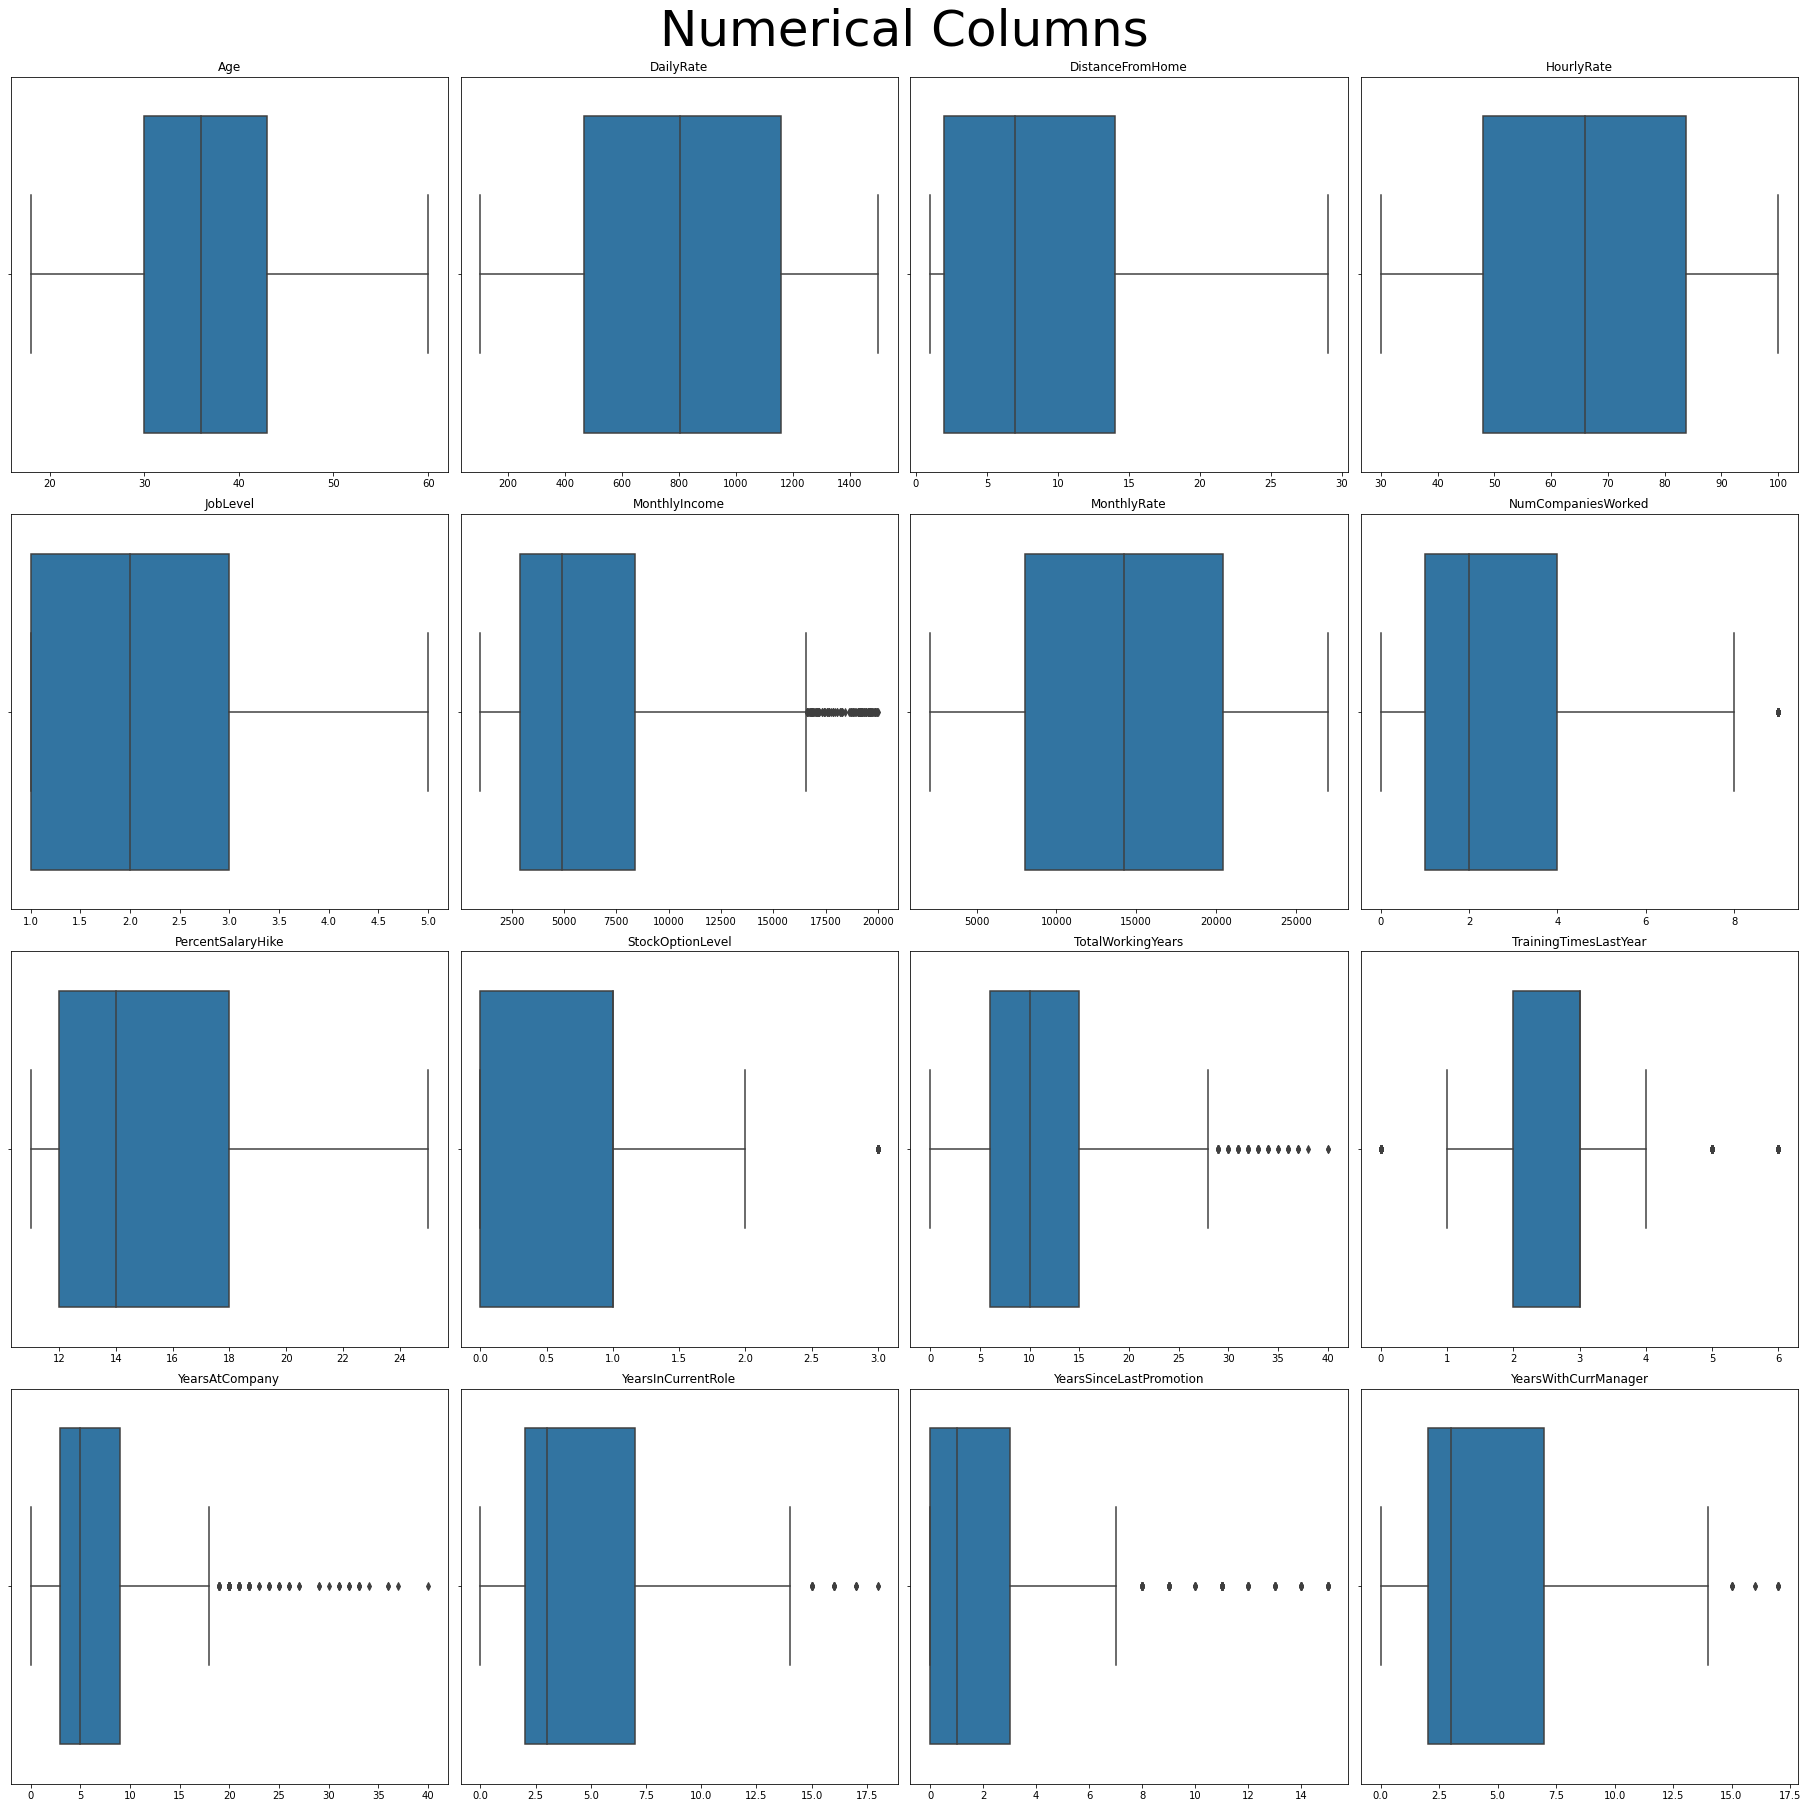

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(25, 25), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Numerical Columns', fontsize=50)

for i in range(len(numerical)):
    sns.boxplot(x=numerical[i], data=df,
                    ax=ax[i]).set(xlabel = None)
    ax[i].set(title = numerical[i])

plt.show()

`boxplot`을 통해 수치형 변수의 이상치 검토를 시도해보았으나 boxplot만으로 이상치를 판단하기엔 무리가 있다고 판단하여 `hisplot`을 같이 사용하여 데이터를 시각화 해보았다

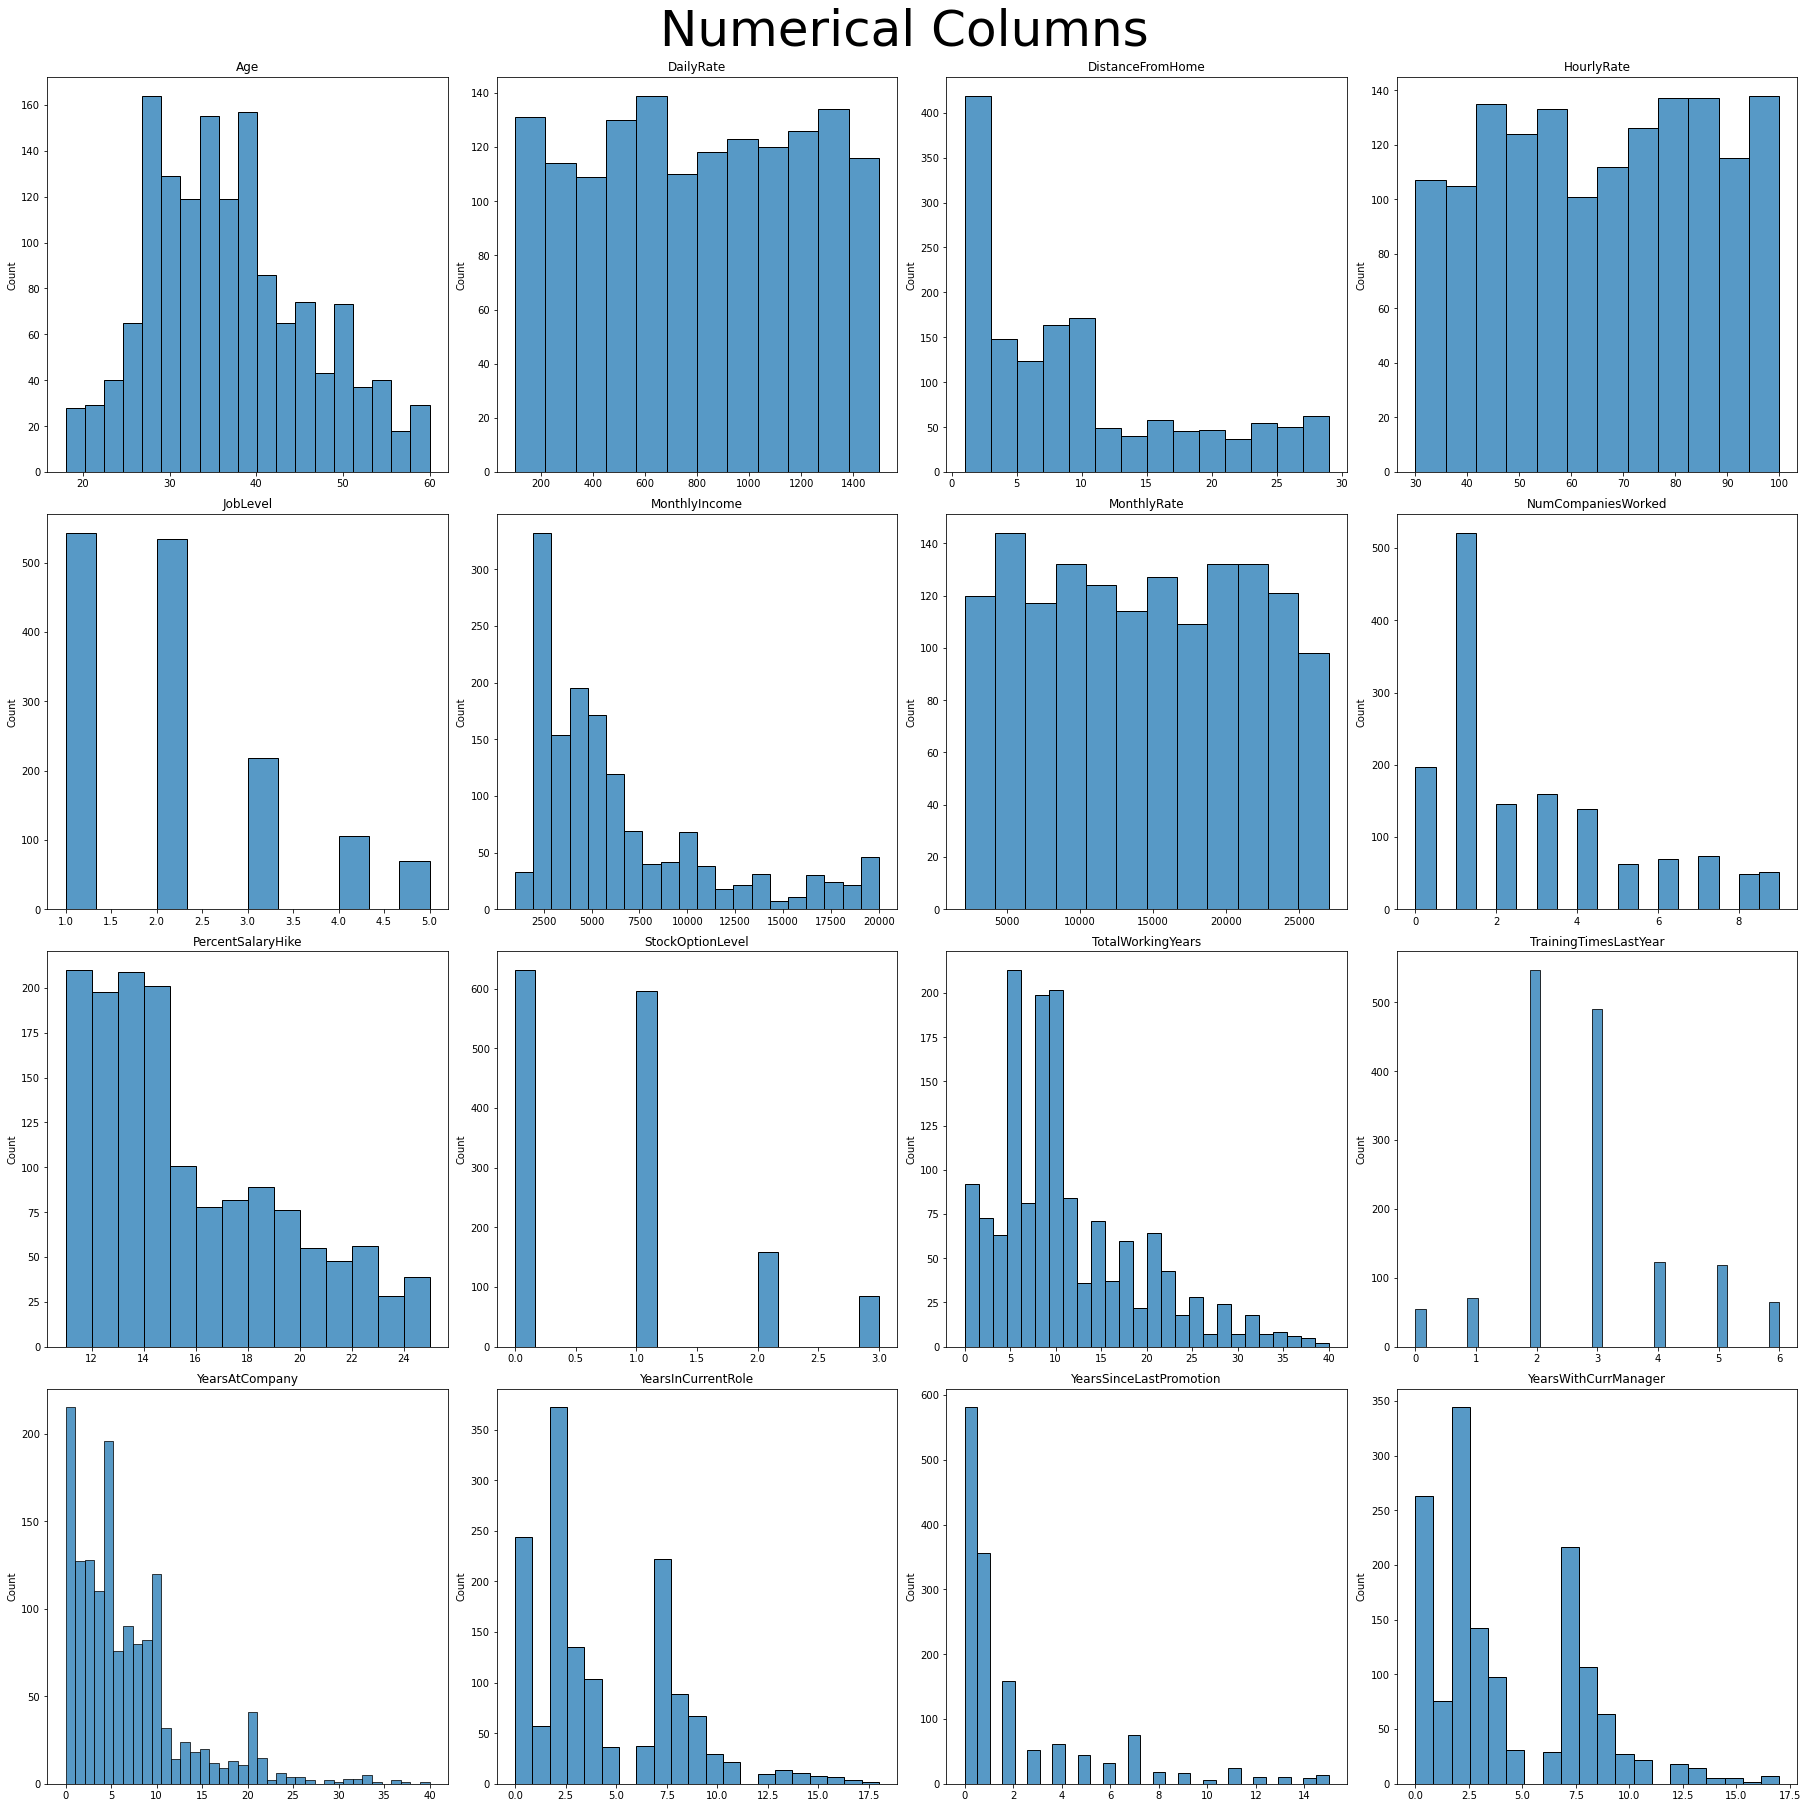

In [14]:
fig, ax = plt.subplots(4, 4, figsize=(25, 25), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Numerical Columns', fontsize=50)

for i in range(len(numerical)):
    sns.histplot(x=numerical[i], data=df,
                    ax=ax[i]).set(xlabel = None)
    ax[i].set(title = numerical[i])

plt.show()

두 가지 plot을 사용하여 수치형 변수의 이상치를 검토해본 결과 `boxplot`에서 이상치로 나온 수치들을 진짜
이상치로 간주하기엔 무리가 있다고 판단하여 처리하지 않았다.

#### 1.3.1 범주형 변수 시각화를 통한 이상치 검토

In [15]:
category = []
for col in df.columns:
    if df[col].dtype == object:
        category.append(col)
print(f'category형 column 개수 : {len(category)}')
print(f'category형 columns : {category}')

category형 column 개수 : 15
category형 columns : ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


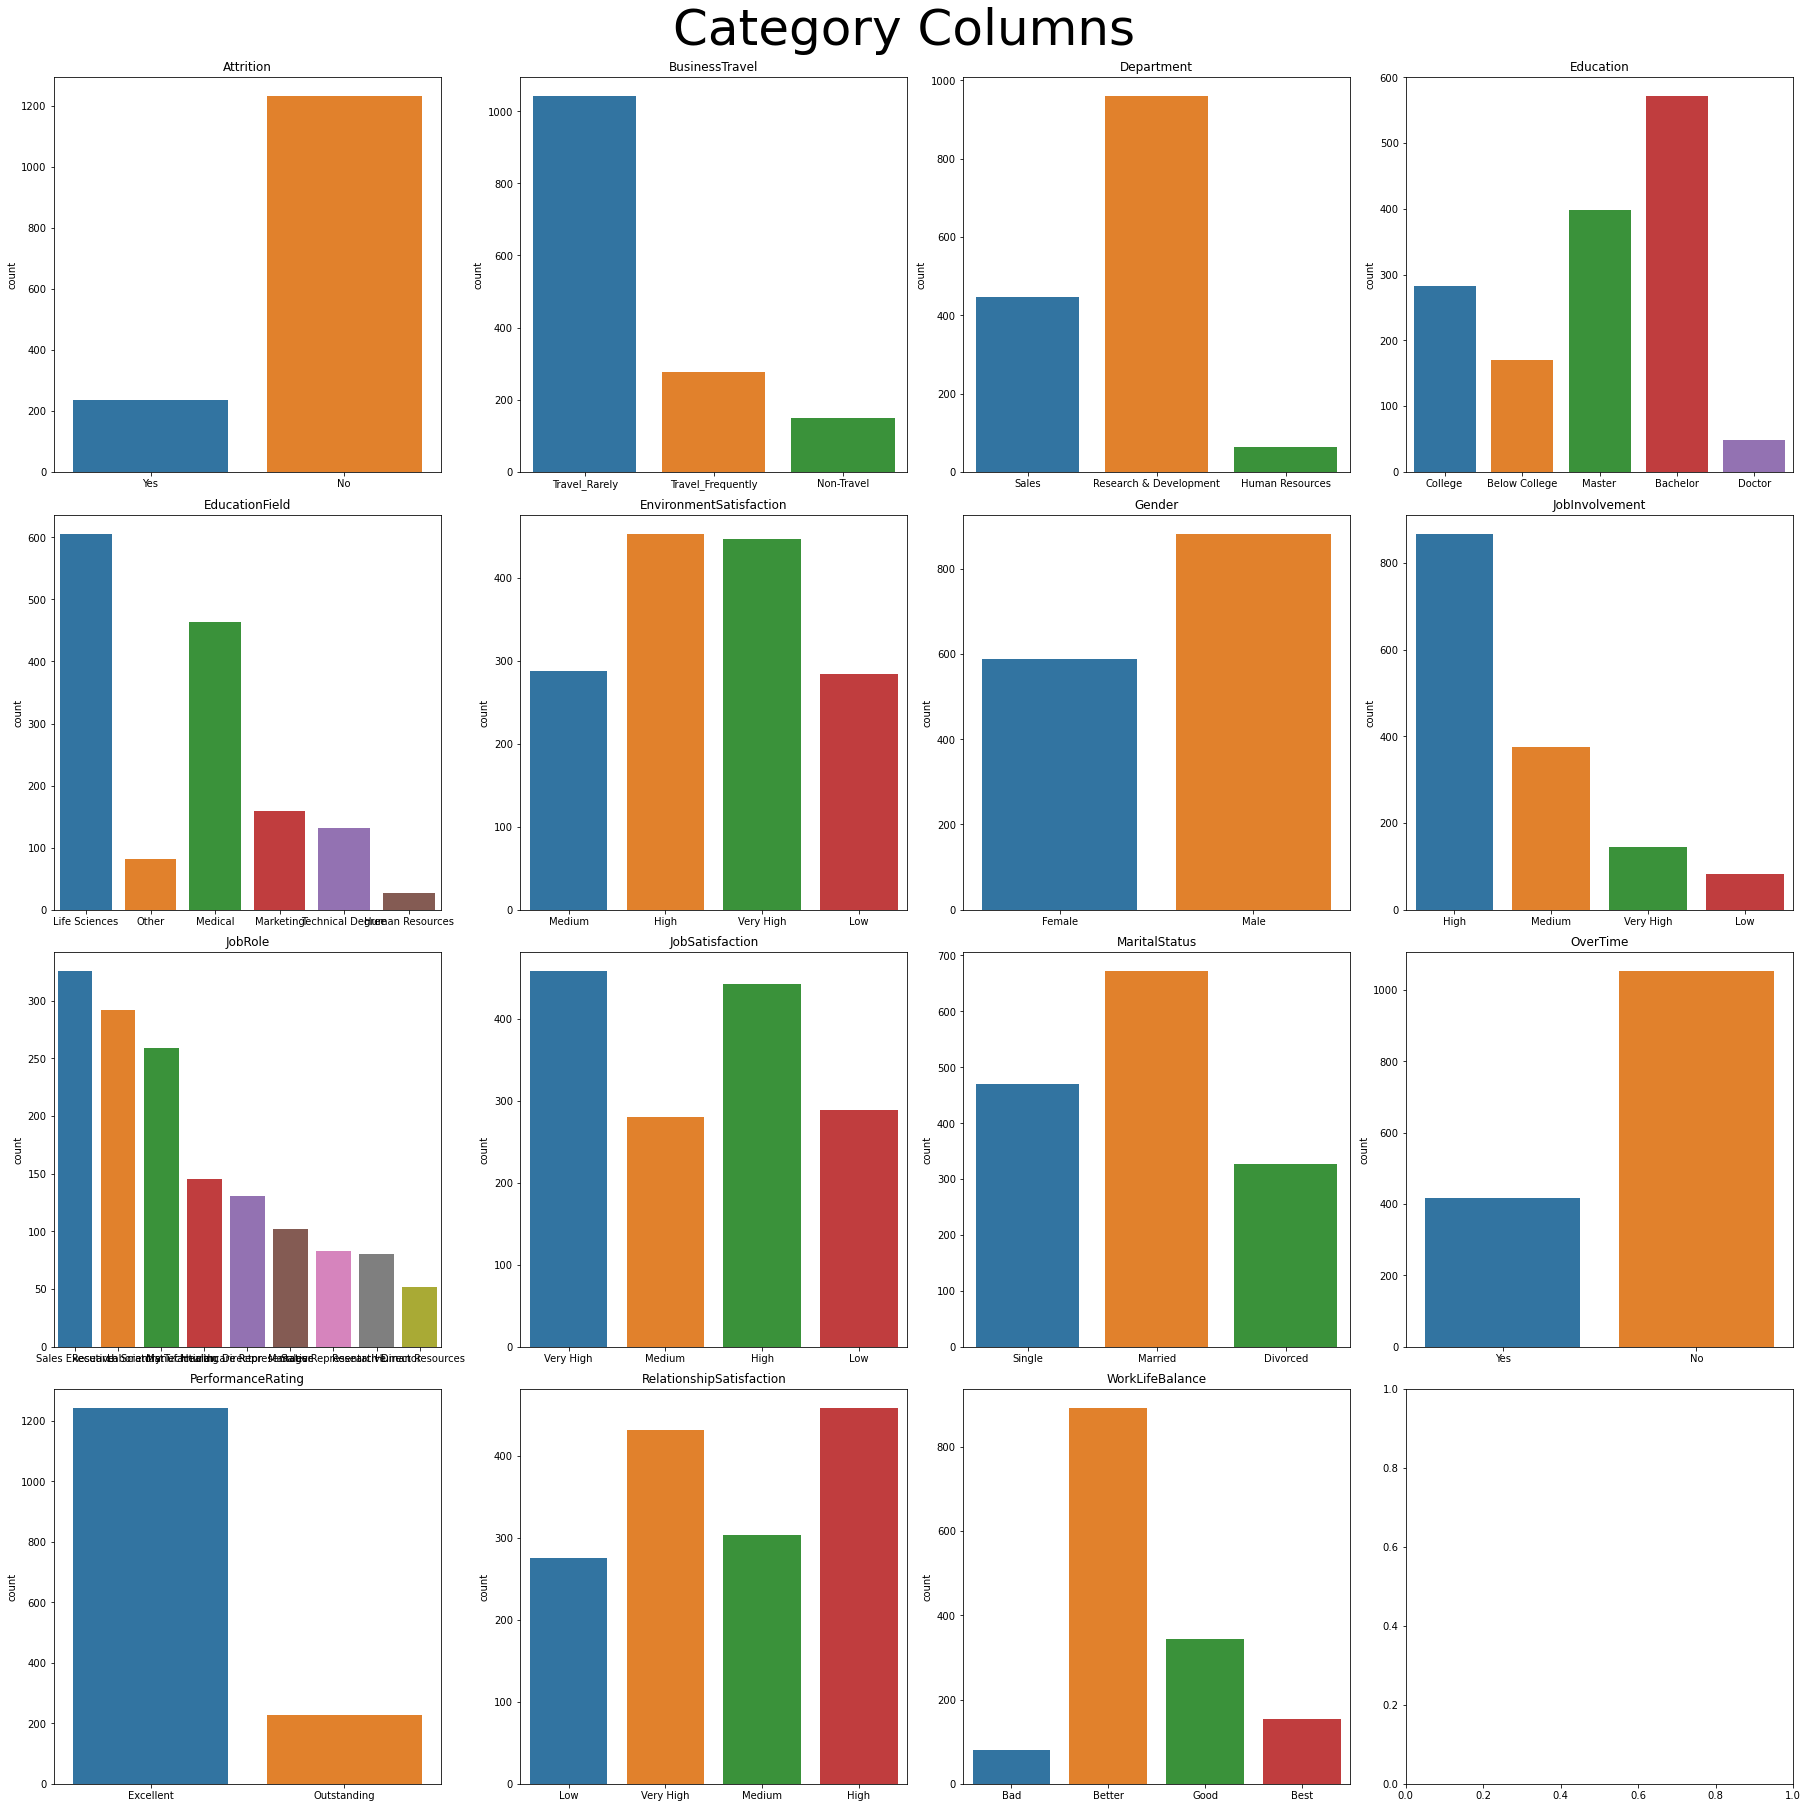

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(25, 25), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Category Columns', fontsize=50)

for i in range(len(category)):
    sns.countplot(x=category[i], data=df,
                    ax=ax[i]).set(xlabel = None)
    ax[i].set(title = category[i])

plt.show()

`countplot`을 통해 카테고리형 데이터를 살펴본 결과 특별히 이상치로 보이는 값이 없다고 판단하였다.

### 2. 유의미한 시각화 5개 이상

#### 2.1 교육의 정도와 월소득

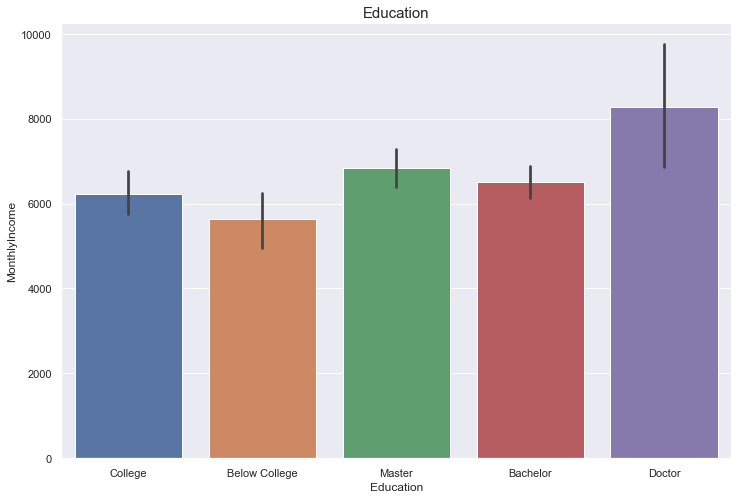

In [204]:
plt.figure(figsize=(12, 8))
plt.title('Education', fontsize=15)

sns.set(font_scale = 0.1)
col1 = pd.DataFrame(df,columns=['Education','MonthlyIncome'])
sns.barplot(col1.Education, col1.MonthlyIncome)
plt.show()

월소득과 교육의 정도와의 관계보았을 때 `Below College` 에서 월소득이 가장 낮았고, 그 다음이 `College, Bachelor, Master` 순으로 높았으며 `Docter`에서 월소득이 가장 높게 나오게 되었다. 이를 보면 교육을 받은 기간이 길어질 수록 월소득이 높다는 것을 알 수 있다.

#### 2.2 근속연수와 월소득

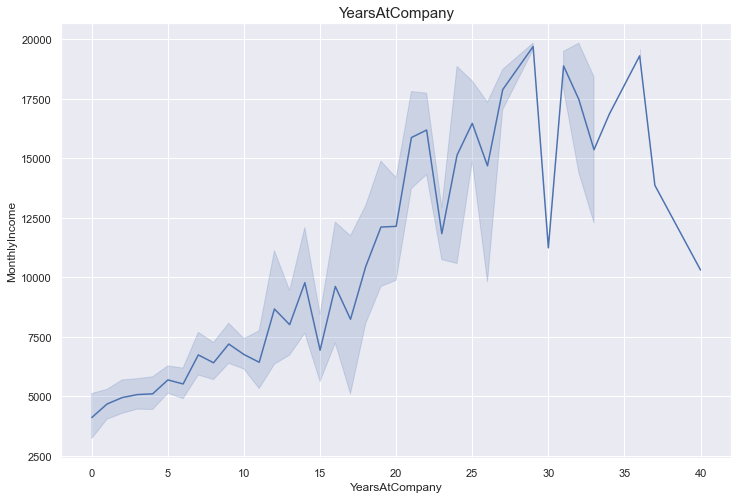

In [46]:
plt.figure(figsize=(12, 8))
plt.title('YearsAtCompany', fontsize=15)

sns.set(font_scale = 0.1)
col2 = pd.DataFrame(df,columns=['YearsAtCompany','MonthlyIncome'])
sns.lineplot(col2.YearsAtCompany, col2.MonthlyIncome)
plt.show()

`YearsAtCompany`와 `MonthlyIncome`의 관계를 보았을 때 근속연수가 길어질 수록 평균적으로 월소득이 증가하는 것을 알 수 있다.  하지만 근속연수가 30년 이상일 떼 특이하게 월소득이 많이 낮은 구간들이 발견되었다.   이를 다시 한 번 확인해보기 위해 근속연수만 그래프로 나타내보았다.

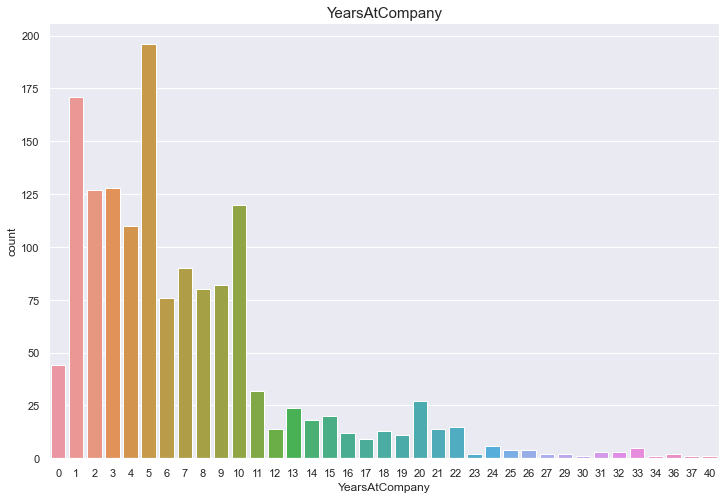

In [72]:
plt.figure(figsize=(12, 8))
plt.title('YearsAtCompany', fontsize=15)

sns.set(font_scale = 0.1)
sns.countplot(x = df['YearsAtCompany'])
plt.show()

근속연수만 따로 그래프를 그려본 결과 근속연수가 30년 이상일 경우의 데이터가 거의 없기 때문에 제대로 된 월소득 평균을 알기 어렵다고 판단을 하였으며, 또한 데이터가 적기 때문에 다른 요인이 반영될 확률이 높다고 판단하였다.

#### 2.3 경력기관과 월소득

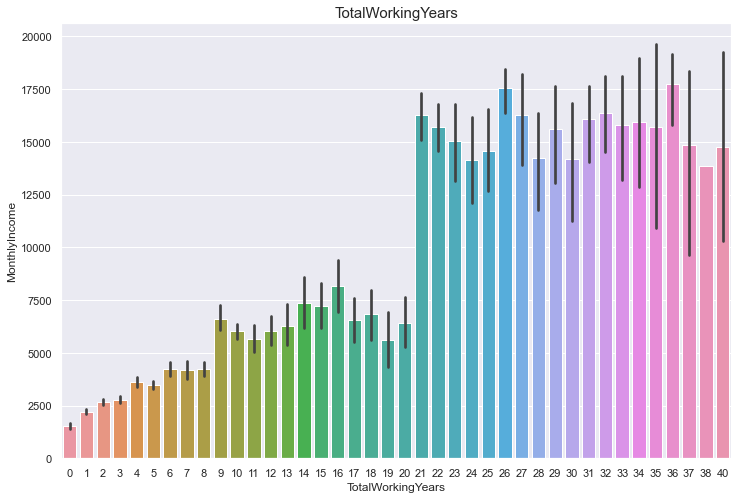

In [159]:
plt.figure(figsize=(12, 8))
plt.title('TotalWorkingYears', fontsize=15)

sns.set(font_scale = 0.1)
col3 = pd.DataFrame(df,columns=['TotalWorkingYears','MonthlyIncome'])
sns.barplot(col3.TotalWorkingYears, col3.MonthlyIncome)
plt.show()

위에서 근속연수에 따른 월소득의 변화를 살펴보며, 근속연수가 아닌 총 경력기간에 따른 월소득의 변화가 어떤 상관관계가 보이는지를 살펴보고자 했다. 해당 그래프를 살펴보면 경력기간이 길 수록 월소득이 증가하는 경향을 보인다. 또한 경력기간이 9년차일 때와 21년차에서 월 소득이 급등하는 모습이다. 

#### 2.4 집과의 거리와 퇴직여부

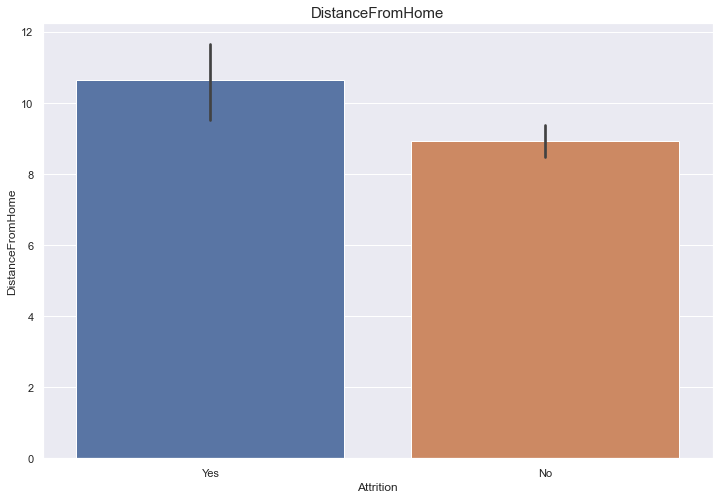

In [190]:
plt.figure(figsize=(12, 8))
plt.title('DistanceFromHome', fontsize=15)

sns.set(font_scale = 0.1)
col4 = pd.DataFrame(df,columns=['Attrition','DistanceFromHome'])
sns.barplot(col4.Attrition, col4.DistanceFromHome)
plt.show()

집과의 거리가 퇴직여부에 영향을 미치는지를 살펴보기 위해 시각화를 진행한 결과, 집과의 거리가 멀수록 퇴직여부가 높은 것을 볼 수 있다. 이를 통해 직장선택에 있어 집과의 거리가 중요한 요인 중 하나라는 것을 알 수 있었다.

#### 2.5 업무만족도와 마지막 프로모션

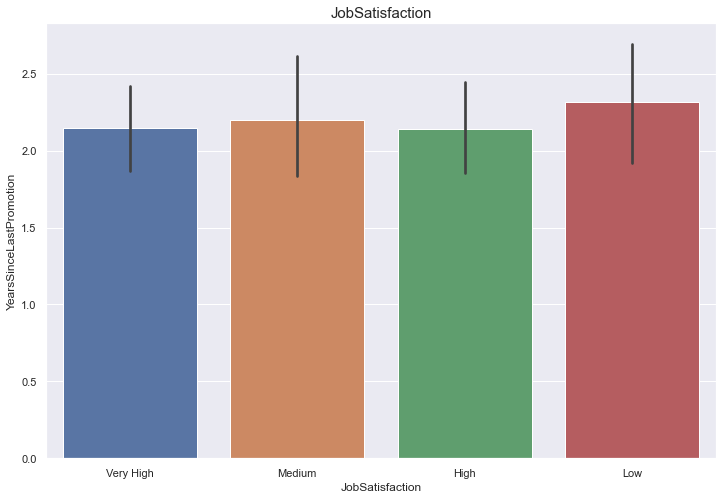

In [232]:
plt.figure(figsize=(12, 8))
plt.title('JobSatisfaction', fontsize=15)

sns.set(font_scale = 0.1)
col5 = pd.DataFrame(df,columns=['JobSatisfaction','YearsSinceLastPromotion'])
sns.barplot(col5.JobSatisfaction, col5.YearsSinceLastPromotion)
plt.show()

업무만족도와 마지막 진급 간의 상관관계를 파악하기 위해 데이터 시각화를 진행해보았다. 시각화 결과 위 그래프에서 알 수 있듯이 업무만족도가 낮을 수록 마지막 진급 후 긴 시간이 지난 것을 알 수 있다. 따라서 진급과 업무만족도와도 상관관계가 있으며, 업무만족도를 높이기 위해서는 진급도 고려해야할 요소라는 것을 알 수 있다.

### 3. 수치형 변수 간 상관관계 파악

In [278]:
numerical = []
for col in df.columns:
    if df[col].dtype == 'int64':
        numerical.append(col)
num_columns = df[numerical].corr()
num_columns

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.002966,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,0.005303,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.027853,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobLevel,0.509604,0.002966,0.005303,-0.027853,1.000000,0.950300,0.039563,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,0.950300,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.039563,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.034730,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
StockOptionLevel,0.037510,0.042143,0.044872,0.050263,0.013984,0.005408,-0.034323,0.030075,0.007528,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698


수치형 변수간의 상관관계 파악을 위해 `heatmap`을 그려보았다.

<AxesSubplot:>

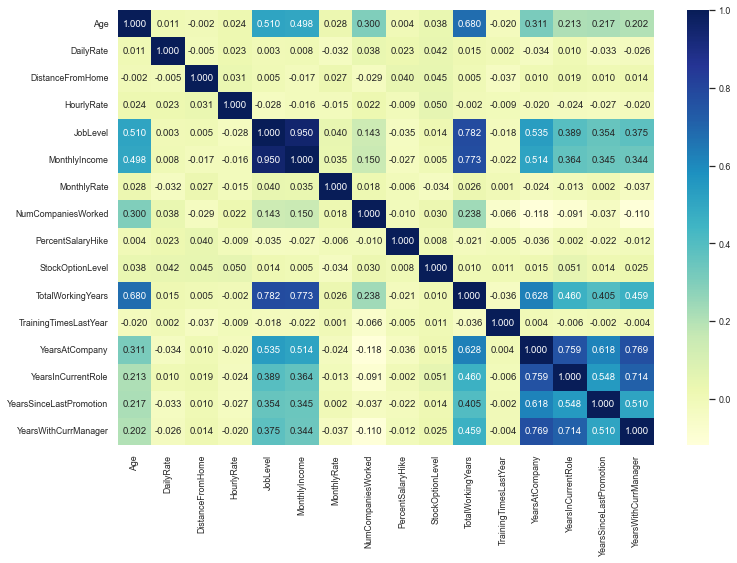

In [277]:
plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
sns.heatmap(num_columns, cmap='YlGnBu', annot=True, fmt='.3f')

1. `Age`와 `Totalworkingyears`와는 높은 상관관계를 보이고 있다. 나이가 많을수록 경력기간이 많은 것은 예측 가능한 결과가 상관계수로서 증명되었음을 알 수 있다.
2. `joplevel` 과 `montlyincome`은 높은 상관관계를 보이고 있다. 업무의 수준이 높을수록 월소득이 높은 것은 자본주의 체제에서 당연한 결과라고 볼 수 있다.
3. `Totalworkingyears`과 `joplevel`높은 상관관계를 보이고 있다. 이는 경력기간이 길수록 업무 수준이 향상되는 것으로 예측 가능한 결과가 상관계수로서 증명되었음을 알 수 있다.

### 4. 파생변수 만들기

#### 회사 당 근로 기간의 지표를 확인할 수 있는 파생변수

총 경력기간에서 일한 회사의 수로 나누어 회사 당 근로 기간의 지표를 확인할 수 있는 파생변수를 만들었다.

In [287]:
df['ConsistencyLevel'] = (df['NumCompaniesWorked']) / df['TotalWorkingYears']
df['ConsistencyLevel'] = df['ConsistencyLevel'].replace(np.Inf, 0)

df['ConsistencyLevel']

0       1.000000
1       0.100000
2       0.857143
3       0.125000
4       1.500000
          ...   
1465    0.235294
1466    0.444444
1467    0.166667
1468    0.117647
1469    0.333333
Name: ConsistencyLevel, Length: 1470, dtype: float64

<AxesSubplot:xlabel='ConsistencyLevel', ylabel='count'>

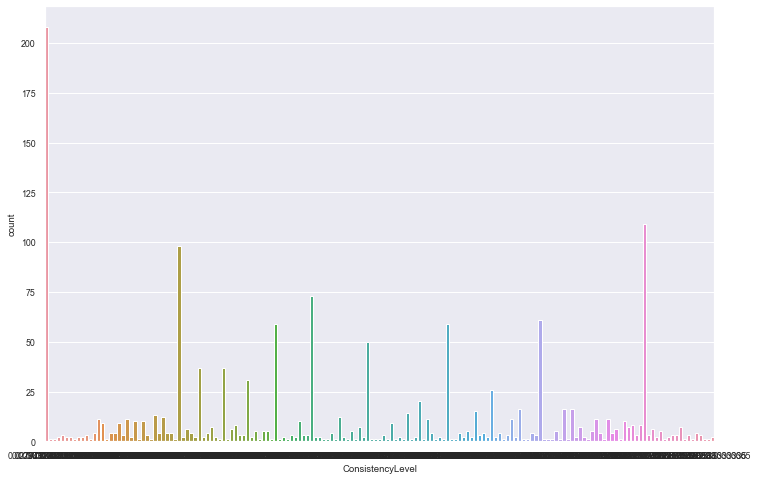

In [288]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['ConsistencyLevel'])